In [13]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import  Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
    from sklearn.isotonic import IsotonicRegression
from sklearn.pipeline import make_pipeline
    from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

from app.models import ExperimentResult

In [2]:
inst = ExperimentResult.objects.get(pk=36)

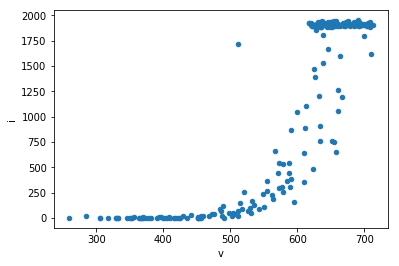

In [3]:
df = pd.DataFrame.from_dict({'i': inst.get_i(), 'v': inst.get_v()})
df.plot.scatter(x='v', y='i')

In [4]:
df.v.min()

259

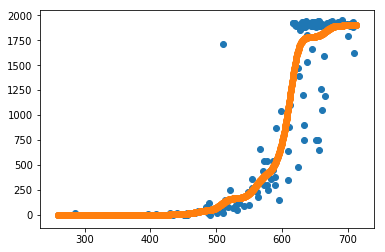

In [19]:
X = df.v.values.reshape([df.v.shape[0], 1])
X = df.v
Y = df.i
n = 1000
model = IsotonicRegression().fit(X, Y)
X_ = np.linspace(df.v.min(), df.v.max(), n)
mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_)})
mdf.i = gaussian_filter(mdf.i, sigma=20)
plt.scatter(df.v, df.i)
plt.scatter(mdf.v, mdf.i)
plt.show()

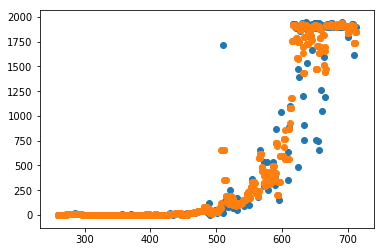

In [6]:
X = df.v.values.reshape([df.v.shape[0], 1])
Y = df.i
n = 1000
model = make_pipeline(PolynomialFeatures(5), RandomForestRegressor()).fit(X, Y)
X_ = np.linspace(df.v.min(), df.v.max(), n)
mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(n, 1))})
plt.scatter(df.v, df.i)
plt.scatter(mdf.v, mdf.i)
plt.show()

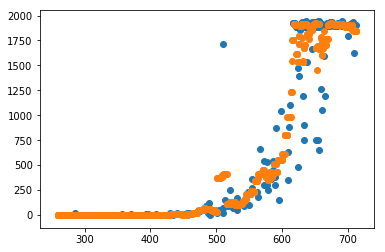

In [7]:
X = df.v.values.reshape([df.v.shape[0], 1])
Y = df.i
n = 1000
model = make_pipeline(PolynomialFeatures(5), KNeighborsRegressor()).fit(X, Y)
X_ = np.linspace(df.v.min(), df.v.max(), n)

mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(n, 1))})
plt.scatter(df.v, df.i)
plt.scatter(mdf.v, mdf.i)
plt.show()

/home/flame/env/urin/lib/python3.5/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4976948227914043e-30 / 1.1102230246251565e-16
  RuntimeWarning)


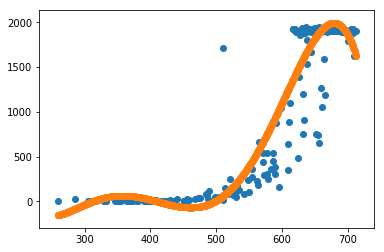

In [8]:
X = df.v.values.reshape([df.v.shape[0], 1])
Y = df.i
n = 1000
model = make_pipeline(PolynomialFeatures(5), Ridge()).fit(X, Y)
X_ = np.linspace(df.v.min(), df.v.max(), n)

mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(n, 1))})
plt.scatter(df.v, df.i)
plt.scatter(mdf.v, mdf.i)
plt.show()

/home/flame/env/urin/lib/python3.5/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4976948227914043e-30 / 1.1102230246251565e-16
  RuntimeWarning)


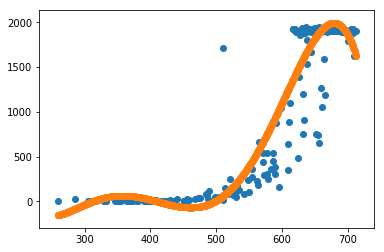

In [9]:
X = df.v.values.reshape([df.v.shape[0], 1])
Y = df.i
n = 1000
model = make_pipeline(PolynomialFeatures(5), Ridge()).fit(X, Y)
X_ = np.linspace(df.v.min(), df.v.max(), n)

mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(n, 1))})
plt.scatter(df.v, df.i)
plt.scatter(mdf.v, mdf.i)
plt.show()

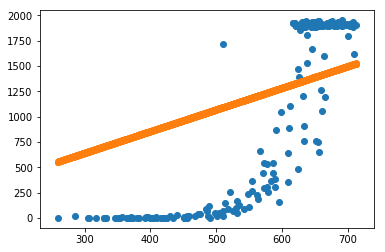

In [10]:
X = df.v.values.reshape([df.v.shape[0], 1])
Y = df.i
n = 1000
model = make_pipeline(PolynomialFeatures(2), MLPRegressor()).fit(X, Y)
model = MLPRegressor().fit(X, Y)
X_ = np.linspace(df.v.min(), df.v.max(), n)

mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(n, 1))})
plt.scatter(df.v, df.i)
plt.scatter(mdf.v, mdf.i)
plt.show()

In [11]:
mdf.i.shape

(1000,)